In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Understanding
We first extract accidents happening before 2020 and then we understand how many different values for each column is there as well as how many different accident categories are there

In [4]:
accidents_dataset = pd.read_csv('./Data/GermanCarAccidentsStats.csv')

features = ['MONATSZAHL','AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']

accidents_dataset = accidents_dataset[features]

accidents_before_2020 = accidents_dataset[ accidents_dataset['JAHR'] < 2020]


# How many different values in every column
print(accidents_before_2020.nunique())

#What are the different categories of accidents are there
print(accidents_before_2020['MONATSZAHL'].value_counts())

# Different Accident effects
print(accidents_before_2020['AUSPRAEGUNG'].value_counts())

MONATSZAHL       3
AUSPRAEGUNG      3
JAHR            20
MONAT          241
WERT           909
dtype: int64
Verkehrsunfälle    780
Alkoholunfälle     520
Fluchtunfälle      520
Name: MONATSZAHL, dtype: int64
Verletzte und Getötete    780
insgesamt                 780
mit Personenschäden       260
Name: AUSPRAEGUNG, dtype: int64


# Visualizing Accidents per Category


## Accidents per type for every year
Here we try to visualize the data to see if the number of accidents and their type changed over the years

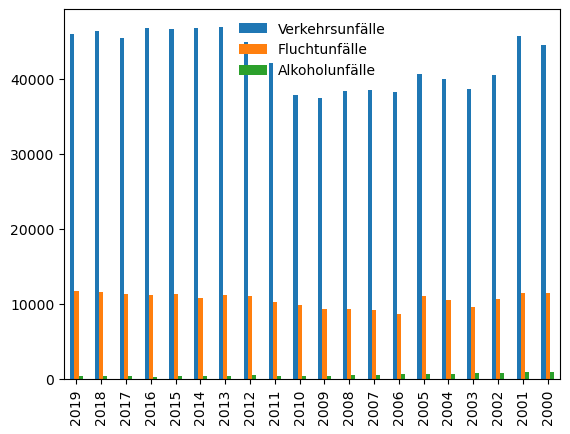

In [5]:
vehicle_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]
hit_and_run_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Fluchtunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]
alcohol_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Alkoholunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]

years = [   i for i in range(2000, 2020 )   ]
years.sort(reverse=True)

accidents_per_year = pd.DataFrame(
    {
        "Verkehrsunfälle": vehicle_accidents['WERT'].to_numpy(),
        "Fluchtunfälle": hit_and_run_accidents['WERT'].to_numpy(),
        "Alkoholunfälle": alcohol_accidents['WERT'].to_numpy()
    },
    index= years
)

accidents_per_year.plot(kind='bar')
plt.legend(framealpha=0)
plt.show()

## Visualize accidents category per month over the years
Here we try to visualize the data to see if there are certain months where the average number of accidents is higher than others

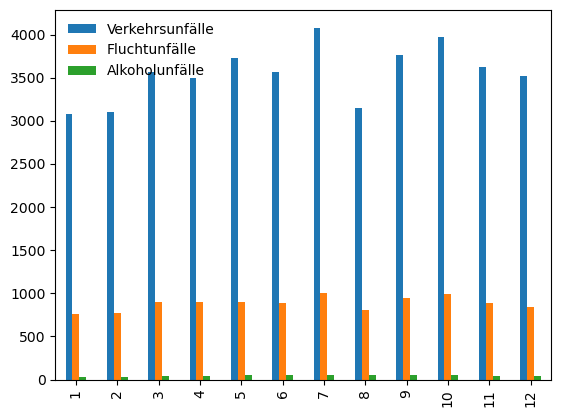

In [6]:
accidents_before_2020_modified = accidents_before_2020.copy()

# Dictionary for strings to elemenate
replace_dict = {str(year):'' for year in range(2000, 2020)}
for i in range(1, 10):
    replace_dict['0' + str(i)] = str(i)


accidents_before_2020_modified['MONAT'] = accidents_before_2020_modified['MONAT'].replace( replace_dict, regex=True )

monthly_vehicle_accidents = []
monthly_alcohol_accidents = []
monthly_run_accidents = []

for i in range(1, 13):
    monthly_vehicle_accidents.append(accidents_before_2020_modified[   ( (accidents_before_2020_modified['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020_modified['MONAT'] == str(i))  &  (accidents_before_2020_modified['AUSPRAEGUNG'] == 'insgesamt')    )  ])
    monthly_run_accidents.append(accidents_before_2020_modified[   ( (accidents_before_2020_modified['MONATSZAHL'] == 'Fluchtunfälle' ) &   (accidents_before_2020_modified['MONAT'] == str(i))  &  (accidents_before_2020_modified['AUSPRAEGUNG'] == 'insgesamt')    )  ])
    monthly_alcohol_accidents.append(accidents_before_2020_modified[   ( (accidents_before_2020_modified['MONATSZAHL'] == 'Alkoholunfälle' ) &   (accidents_before_2020_modified['MONAT'] == str(i))  &  (accidents_before_2020_modified['AUSPRAEGUNG'] == 'insgesamt')    )  ])

monthly_vehicle_accidents_average = []
monthly_alcohol_accidents_average = []
monthly_run_accidents_average = []

for vehicle_accidents, alcohol_accidents, run_accidents in zip(monthly_vehicle_accidents, monthly_alcohol_accidents, monthly_run_accidents):
    monthly_vehicle_accidents_average.append(vehicle_accidents['WERT'].mean())
    monthly_alcohol_accidents_average.append(alcohol_accidents['WERT'].mean())
    monthly_run_accidents_average.append(run_accidents['WERT'].mean())


months = [i for i in range(1, 13)]

accidents_per_month = pd.DataFrame(
    {
        "Verkehrsunfälle": monthly_vehicle_accidents_average,
        "Fluchtunfälle": monthly_run_accidents_average,
        "Alkoholunfälle": monthly_alcohol_accidents_average
    },
    index= months
)

accidents_per_month.plot(kind='bar')
plt.legend(loc='upper left', framealpha=0)
plt.show()



# Total number of Accidents per month for each year
We add up the total number of accidents across categories for every month, we end up with 240 values for each month over the 20 years from 2000-2019

In [7]:
import numpy as np
vehicle_accidents_monthly = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020['MONAT'] != 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]['WERT']
hit_and_run_accidents_monthly = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Fluchtunfälle' ) &   (accidents_before_2020['MONAT'] != 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]['WERT']
alcohol_accidents_monthly = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Alkoholunfälle' ) &   (accidents_before_2020['MONAT'] != 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]['WERT']

accidents_monthly = vehicle_accidents_monthly.to_numpy(dtype=np.int32) + hit_and_run_accidents_monthly.to_numpy(dtype=np.int32) + alcohol_accidents_monthly.to_numpy(dtype=np.int32)

months = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020['MONAT'] != 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]['MONAT'].to_numpy()

x = np.empty((240, 2), dtype=np.int16)

for i, month in enumerate(months, 0):
    year = month[0:4]
    actual_month = month[4:]
    x[i, 0] = year
    x[i, 1] = actual_month


training_dataset = pd.DataFrame(
    {
        'Year': x[:,0],
        'Month': x[:, 1],
        'Accidents': accidents_monthly
    }
)

features = ['Year', 'Month']
X = training_dataset[features]
y = training_dataset.Accidents


# Training a decision Tree
We train a decision tree to estimate the number of accidents

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from numpy import ceil


accident_regressor = DecisionTreeRegressor(random_state=1, max_depth=6, criterion="mse")

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

accident_regressor.fit(train_X, train_y)

val_predictions = ceil(accident_regressor.predict(val_X))

print( sqrt(mean_squared_error(val_y, val_predictions)) )
print(val_predictions[0:5])
print(val_y.head())

train_predictions = ceil(accident_regressor.predict(train_X))

print(sqrt( mean_squared_error(train_y, train_predictions)))
print(train_predictions[0:5])
print(train_y[0:5])




442.67339352318584
[4154. 4839. 3942. 5066. 3017.]
109    3245
71     4774
37     4168
74     4639
108    2978
Name: Accidents, dtype: int32
231.93714426302847
[5066. 4329. 5601. 4913. 4715.]
75     5074
215    3792
90     5382
230    4830
201    4665
Name: Accidents, dtype: int32


# Tuning the Hyperparameters
Using Grid Search and 5-fold cross validation, we try to find the best Hyperparameters for our decision tree. Specifically we are searching for the best tree depth(good balance between Learning Capacity and avoiding Overfitting) and minimum sample size to split the tree at

In [9]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(2, 30)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(train_X, train_y)
print(gs.best_params_)
print(sqrt(-gs.best_score_))


{'max_depth': 8, 'min_samples_split': 9}
397.23058407191553


In [10]:
tuned_regressor = DecisionTreeRegressor(random_state=1, max_depth=8, min_samples_split=9)
tuned_regressor.fit(train_X, train_y)

val_predictions = ceil(tuned_regressor.predict(val_X))

print( sqrt(mean_squared_error(val_y, val_predictions)) )
print(val_predictions[0:5])
print(val_y.head())

train_predictions = ceil(tuned_regressor.predict(train_X))

print(sqrt( mean_squared_error(train_y, train_predictions)))
print(train_predictions[0:5])
print(train_y[0:5])

424.684510352489
[4071. 4477. 4013. 5066. 3679.]
109    3245
71     4774
37     4168
74     4639
108    2978
Name: Accidents, dtype: int32
231.47231655930983
[5066. 4329. 5601. 4872. 4715.]
75     5074
215    3792
90     5382
230    4830
201    4665
Name: Accidents, dtype: int32


# Random Forest Tree
To improve the model accuracy even further, we will use Random Forest Trees. Since the search space for the best parameters for Random Forest Trees is huge, we will not use Grid Search but rather randomized search to find the best parameters. At the end, the best parameters would be compared against line search(for the best number of estimators given the best parameters for a signle tree) would be made to find the absolute best parameters.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

min_score = np.inf
best_param = {}
for i in range(10):
    rs = RandomizedSearchCV(RandomForestRegressor(random_state=1), 
                    param_distributions={"n_estimators": range(50, 300, 50), "max_depth":range(1, 11), "min_samples_split":range(2, 30)},
                    cv=5,
                    n_iter=100,
                    scoring='neg_mean_squared_error',
                    n_jobs=4                    
                    )
    rs.fit(train_X, train_y)
    if sqrt(-rs.best_score_)  < min_score:
        best_param = rs.best_params_
        min_score = sqrt(-rs.best_score_)


print(best_param)
print(min_score)



## Comparing the best results we got with Line Search given the optimum parameters for a single tree

In [1]:
gs = GridSearchCV(RandomForestRegressor(random_state=1, max_depth=8, min_samples_split=9),
                  param_grid = {'n_estimators': range(50, 300, 10)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(train_X, train_y)
print(gs.best_params_)
print(sqrt(-gs.best_score_))

# 120, 9, 9, 353.882


NameError: name 'GridSearchCV' is not defined

# Best Results
Clearly the results from the randomized search are better, so we build the random forest tree given those paramaeters

In [ ]:
accidents_forest_regressor = RandomForestRegressor(random_state=1, max_depth= 10, n_estimators=100, min_samples_split=5)
accidents_forest_regressor.fit(train_X, train_y)

val_predictions = ceil(accidents_forest_regressor.predict(val_X))

print( sqrt(mean_squared_error(val_y, val_predictions)) )
print(val_predictions[0:5])
print(val_y.head())

train_predictions = ceil(accidents_forest_regressor.predict(train_X))

print(sqrt( mean_squared_error(train_y, train_predictions)))
print(train_predictions[0:5])
print(train_y[0:5])

# Saving the best model

In [ ]:
import joblib
joblib.dump(accidents_forest_regressor, './models/regressor.joblib')

## Testing that the model can load and function correctly

In [ ]:
loaded_rf = joblib.load('./models/regressor.joblib')
predictions = ceil(loaded_rf.predict(train_X))
print(predictions[0: 5])

In [ ]:
#### Extras

'''accidents_forest_regressor = RandomForestRegressor(max_depth=20, random_state=1, criterion="mae")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(accidents_forest_regressor, train_X, train_y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))'''

#train_pred = accidents_forest_regressor.predict(train_X)
#print(mean_absolute_error(train_y, train_pred))

'''
accidents_forest_regressor.fit(train_X, train_y)

val_predictions = accidents_forest_regressor.predict(val_X)

print( mean_absolute_error(val_y, val_predictions) )
print(val_predictions[0:5])
print(val_y.head())

train_predictions = accidents_forest_regressor.predict(train_X)

print(mean_absolute_error(train_y, train_predictions))
print(train_predictions[0:5])
print(train_y[0:5])'''


'''gs = GridSearchCV(RandomForestRegressor(),
                  param_grid = {'max_depth': range(1, 20),
                                'min_samples_split': range(2, 30)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(train_X, train_y)

print(gs.best_params_)
print(-gs.best_score_)'''

# Reading Queries from JSON file

In [ ]:
import json
argparse_dict = {}
with open('./Queries/my_query.JSON') as infile:
    json_dict = json.load(infile)

argparse_dict.update(json_dict)
print(argparse_dict)


FileNotFoundError: [Errno 2] No such file or directory: './Queries/my_query.JSON'

In [ ]:
df = pd.DataFrame({
                "Year": argparse_dict['year'],
                "Month": argparse_dict['month']

                },
                index = [0]      
            )
print(df)

   Year  Month
0  2020     10


In [ ]:
loaded_rf = joblib.load('./models/regressor.joblib')
prediction = ceil(loaded_rf.predict(df))

print(prediction)

result = {'prediction': prediction[0]}
with open('./Predictions/my_prediction.JSON', 'w') as outfile:
    json.dump(result, outfile)




[5453.]
